In [1]:
!pip3 install gymnasium


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


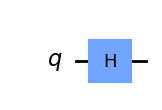

In [2]:
from qiskit import QuantumCircuit, Aer
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import XGate, YGate, ZGate, HGate, SGate, TGate, IGate
import gymnasium as gym
from gymnasium import spaces
c = QuantumCircuit(1)
c.h(0)
c.draw(output='mpl')

In [3]:
def get_score(circuit):
    sim = Aer.get_backend('statevector_simulator')
    result = sim.run(c, shots=1).result().get_statevector()
    return Statevector(result).probabilities()[1]

In [4]:
get_score(c)

0.4999999999999999

In [5]:
class QiskitEnv(gym.Env):
    def __init__(self, size=1):
        self.size = size  # The size of the circuit
        self.circuit = QuantumCircuit(self.size)

        # We have 4 different gates
        self.action_space = spaces.Discrete(4)

        self._action_to_direction = {
            0: XGate(),
            1: YGate(),
            2: ZGate(),
            3: HGate(),
        }
    
    def get_score(self):
        sim = Aer.get_backend('statevector_simulator')
        result = sim.run(self.circuit, shots=1).result().get_statevector()
        return Statevector(result).probabilities()[1]
    
    def reset(self):
        self.circuit = QuantumCircuit(self.size)
        
        return self.get_score()
    
    def step(self, action):
        self.circuit.append(self._action_to_direction[action], [0])
        return self.get_score(), self.get_score()
    
    def render(self):
        return self.circuit.draw(output="mpl")

In [6]:
import gymnasium
import onequbit

In [7]:
env = gymnasium.make('onequbit/Qiskit-v0')

In [8]:
observation, info = env.reset()

/home/kknopp/Documents/Work/QWorld/env/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:197: DeprecationWarning: WARN: Current gymnasium version requires that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.deprecation(
/home/kknopp/Documents/Work/QWorld/env/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:210: DeprecationWarning: WARN: Current gymnasium version requires that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.deprecation(
/home/kknopp/Documents/Work/QWorld/env/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:188: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


In [9]:
observation

{'agent': array([1, 0]), 'target': array([0, 1])}

In [15]:
for _ in range(10):
    action = env.action_space.sample()  # agent policy that uses the observation and info
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated:
        break
    
    print(observation, reward)

env.close()

{'agent': array([1.00000000e+00, 5.37469246e-31]), 'target': array([0, 1])} 5.374692456031843e-31
{'agent': array([5.37469246e-31, 1.00000000e+00]), 'target': array([0, 1])} 1.0
{'agent': array([1.00000000e+00, 5.37469246e-31]), 'target': array([0, 1])} 5.374692456031843e-31
{'agent': array([5.37469246e-31, 1.00000000e+00]), 'target': array([0, 1])} 1.0
{'agent': array([0.5, 0.5]), 'target': array([0, 1])} 0.5000000000000007
{'agent': array([5.0372465e-31, 1.0000000e+00]), 'target': array([0, 1])} 1.0
{'agent': array([1.0000000e+00, 5.0372465e-31]), 'target': array([0, 1])} 5.037246504932926e-31
{'agent': array([0.5, 0.5]), 'target': array([0, 1])} 0.4999999999999993
{'agent': array([0.5, 0.5]), 'target': array([0, 1])} 0.4999999999999993
{'agent': array([0.5, 0.5]), 'target': array([0, 1])} 0.4999999999999993
